In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vel=np.loadtxt('vel.txt')/1000

In [4]:
a=np.loadtxt('21cmsurvey.txt')

In [6]:
a[0]

array([147.30999969, 147.2599997 , 147.2099997 , 147.15999971,
       147.10999972, 147.05999972, 147.00999973, 146.95999973,
       146.90999974, 146.85999975, 146.80999975, 146.75999976,
       146.70999976, 146.65999977, 146.60999978, 146.55999978,
       146.50999979, 146.45999979, 146.4099998 , 146.35999981,
       146.30999981, 146.25999982, 146.20999982, 146.15999983,
       146.10999984, 146.05999984, 146.00999985, 145.95999985,
       145.90999986, 145.85999987, 145.80999987, 145.75999988,
       145.70999988, 145.65999989, 145.6099999 , 145.5599999 ,
       145.50999991, 145.45999991, 145.40999992, 145.35999993,
       145.30999993, 145.25999994, 145.20999994, 145.15999995,
       145.10999996, 145.05999996, 145.00999997, 144.95999997,
       144.90999998, 144.85999999, 144.80999999, 144.76      ,
       144.71      , 144.66000001, 144.61000002, 144.56000002,
       144.51000003, 144.46000003, 144.41000004, 144.36000005,
       144.31000005, 144.26000006, 144.21000006, 144.16

In [7]:
spgr=a[1:]

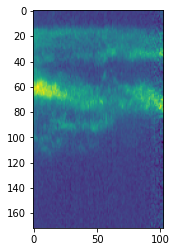

In [8]:
plt.imshow(spgr)

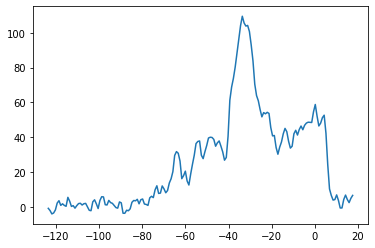

In [10]:
plt.plot(vel,spgr[:,0])

In [11]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [12]:
x=vel
y=spgr[:,0]

Text(0, 0.5, '$T_b$ (K)')

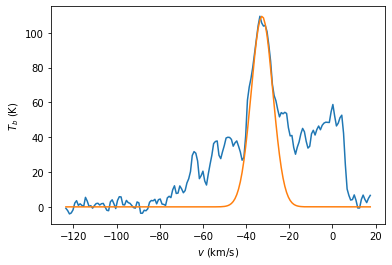

In [21]:
g1=gauss(x, y.max(),x[np.argmax(y)]+1,5)
hist_fit = g1

plt.plot(x, y, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')
plt.xlabel("$v$ (km/s)")
plt.ylabel("$T_b$ (K)")

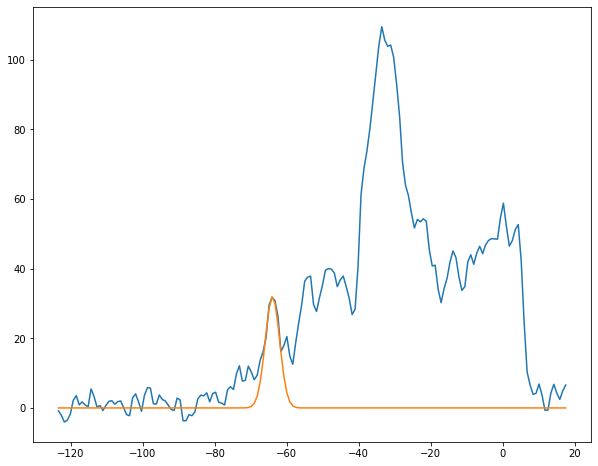

In [34]:
plt.figure(figsize=(10,8))
g1=gauss(x, 32,-64,2)

hist_fit = g1

plt.plot(x, y, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')

In [38]:
dv=vel[0]-vel[1]

In [42]:
integ=np.trapz(g1, dx=dv)
integ

160.42420957638396

In [43]:
integ*1.82e18

2.9197206142901882e+20

In [46]:
ancho=2 #km/s

In [47]:
ancho*1000/210 # kHz

9.523809523809524

In [53]:
1.017*np.sqrt(88)

9.540305655480855

In [54]:
from lmfit.models import GaussianModel

In [63]:
gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-70, min=-80, max=0)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_amplitude'].set(value=1000, min=20,max=3000)
                         
gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params()) 

pars['g2_center'].set(value=0, min=-80, max=0)
pars['g2_sigma'].set(value=2, min=1,max=10)
pars['g2_amplitude'].set(value=1000, min=20,max=3000)


In [64]:
mod = gauss1 + gauss2

In [65]:
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 294
    # data points      = 172
    # variables        = 6
    chi-square         = 51929.3664
    reduced chi-square = 312.827508
    Akaike info crit   = 994.144985
    Bayesian info crit = 1013.02995
[[Variables]]
    g1_amplitude:  637.084885 +/- 224.610442 (35.26%) (init = 1000)
    g1_center:    -57.3566448 +/- 4.35406528 (7.59%) (init = -70)
    g1_sigma:      10.0000000 +/- 3.74530681 (37.45%) (init = 2)
    g1_fwhm:       23.5482000 +/- 8.81952338 (37.45%) == '2.3548200*g1_sigma'
    g1_height:     25.4160109 +/- 5.47145614 (21.53%) == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  2202.54733 +/- 244.884836 (11.12%) (init = 1000)
    g2_center:    -29.7236770 +/- 1.21003608 (4.07%) (init = 0)
    g2_sigma:      9.99999997 +/- 3.11857332 (31.19%) (init = 2)
    g2_fwhm:       23.5481999 +/- 

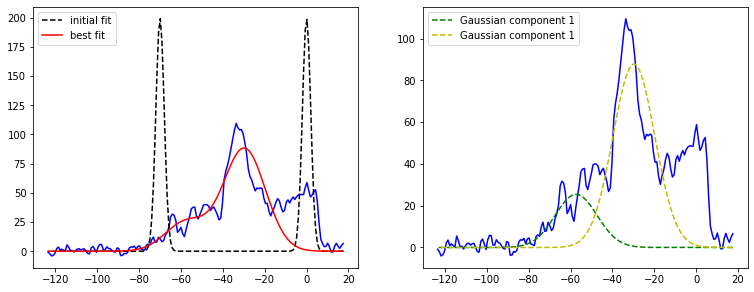

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], 'y--', label='Gaussian component 1')


axes[1].legend(loc='best')

In [76]:
gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-30, min=-40, max=-20)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_amplitude'].set(value=1000, min=20,max=3000)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=0, min=-10, max=0)
pars['g2_sigma'].set(value=2, min=1,max=10)
pars['g2_amplitude'].set(value=400, min=20,max=1000)

gauss3 = GaussianModel(prefix='g3_')
pars.update(gauss3.make_params())

pars['g3_center'].set(value=-20, min=-30, max=0)
pars['g3_sigma'].set(value=2, min=1,max=10)
pars['g3_amplitude'].set(value=100, min=10,max=1000)

gauss4 = GaussianModel(prefix='g4_')
pars.update(gauss4.make_params())

pars['g4_center'].set(value=-50, min=-60, max=-40)
pars['g4_sigma'].set(value=2, min=1,max=5)
pars['g4_amplitude'].set(value=100, min=10,max=1000)

gauss5 = GaussianModel(prefix='g5_')
pars.update(gauss5.make_params())

pars['g5_center'].set(value=-65, min=-70, max=-60)
pars['g5_sigma'].set(value=2, min=1,max=10)
pars['g5_amplitude'].set(value=200, min=1,max=1000)



mod = gauss1 + gauss2 + gauss3 + gauss4 + gauss5

In [77]:
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

[[Model]]
    ((((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(gaussian, prefix='g4_')) + Model(gaussian, prefix='g5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 133
    # data points      = 172
    # variables        = 15
    chi-square         = 3834.05735
    reduced chi-square = 24.4207474
    Akaike info crit   = 563.919717
    Bayesian info crit = 611.132135
[[Variables]]
    g1_amplitude:  1177.67230 +/- 364.997465 (30.99%) (init = 1000)
    g1_center:    -33.3591522 +/- 0.34424262 (1.03%) (init = -30)
    g1_sigma:      4.94648507 +/- 0.51060002 (10.32%) (init = 2)
    g1_fwhm:       11.6480820 +/- 1.20237113 (10.32%) == '2.3548200*g1_sigma'
    g1_height:     94.9812420 +/- 20.4029567 (21.48%) == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  627.521992 +/- 232.659300 (37.08%) (init = 400)
    g2_center:    -0.12740373 +/- 0.73721820 (578.65%) (init 

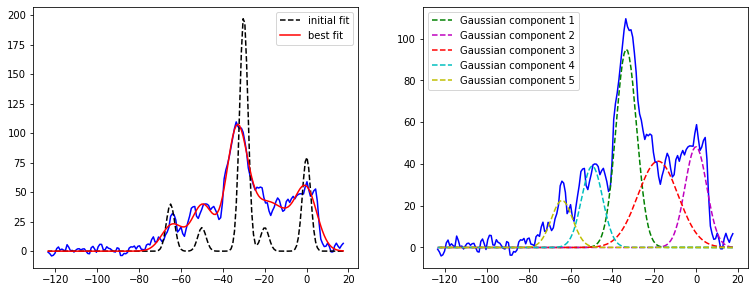

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], 'm--', label='Gaussian component 2')
axes[1].plot(x, comps['g3_'], 'r--', label='Gaussian component 3')
axes[1].plot(x, comps['g4_'], 'c--', label='Gaussian component 4')
axes[1].plot(x, comps['g5_'], 'y--', label='Gaussian component 5')


axes[1].legend(loc='best')

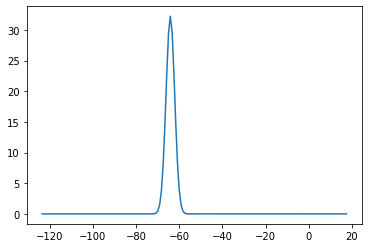

In [74]:
plt.plot(vel,comps['g5_'])

In [75]:
np.trapz(comps['g5_'], dx=dv)

161.579116010529